# Classification

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### using the mnist dataset from kaggle

In [103]:
#seperating the data and labels from the training set
mnist_train = pd.read_csv('datasets/train.csv')
X_train = mnist_train .ix[:,1:]#data for training
y_train = mnist_train.ix[:,0]#labels for training

In [104]:
#seperating the data and labels from the testing set
mnist_test = pd.read_csv('datasets/test.csv')
X_test = mnist_test#data for testing

### showing one of the images

In [4]:
some_digit = X_train.ix[360,:]
some_digit_image = some_digit.values.reshape(28,28)

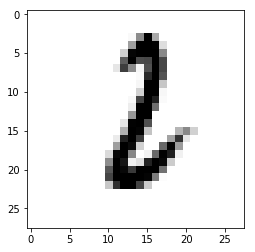

In [5]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = 'nearest')

In [6]:
#lets see if its a two or not
y_train.ix[360,:]

2

In [7]:
#shuffling the datasets
shuffle_index = np.random.permutation(len(X_train))
X_train , y_train = X_train.ix[shuffle_index,:] , y_train[shuffle_index]

### Training a binary classifier to check wheter a digit is 2 or not

In [8]:
y_train_2 = (y_train == 2)#output is a series of true and false 
y_test_2 = (y_test ==2)

In [9]:
#training using a SGD classifier(stochastic gradient descent)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [10]:
#lets see if it can detect the number 2
sgd_clf.predict([some_digit])#it guessed it wrong

array([False], dtype=bool)

### Performance measures

## Accuracy

In [11]:
#sklearn has a function called cross_val_score() that does the same thing
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([ 0.97071638,  0.93692857,  0.95621116])

In [12]:
from sklearn.base import BaseEstimator

class Never2classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [13]:
nvr2clf = Never2classifier()
cross_val_score(nvr2clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([ 0.899     ,  0.90135714,  0.90128571])

#### well accuracy is not a good measure when it comes to peroformance mearure especially when the dataset is skewed i.e. when some classes are more frequent than others

## Confusion Matrix

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_2,cv =3)

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matr = confusion_matrix(y_train_2,y_train_pred)
cnf_matr

array([[36347,  1476],
       [  430,  3747]])

In [16]:
cnf_matr = DataFrame(cnf_matr)
cnf_matr.columns = ['Predicted_False','Predicted_True']
cnf_matr.index = ['Actual_False','Actual_True']
cnf_matr

,Predicted_False,Predicted_True
Actual_False,36347,1476
Actual_True,430,3747


## precison = TP/(TP + FP) and recall = TP/(TP + FN)

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_2,y_train_pred)

0.71740379092475592

In [18]:
3511/(3511+427)

0.8915693245302184

In [19]:
recall_score(y_train_2,y_train_pred)

0.89705530284893464

In [20]:
3511/(3511+666)

0.8405554225520708

## F1 score = 2 x (precision x Recall)/(precision + Recall)

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_2,y_train_pred)

0.79723404255319141

## plot for precision and recall vs threshold

In [22]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_2,cv = 3,method ='decision_function')

In [23]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_2,y_scores)

In [24]:
precisions.shape

(41286,)

In [25]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

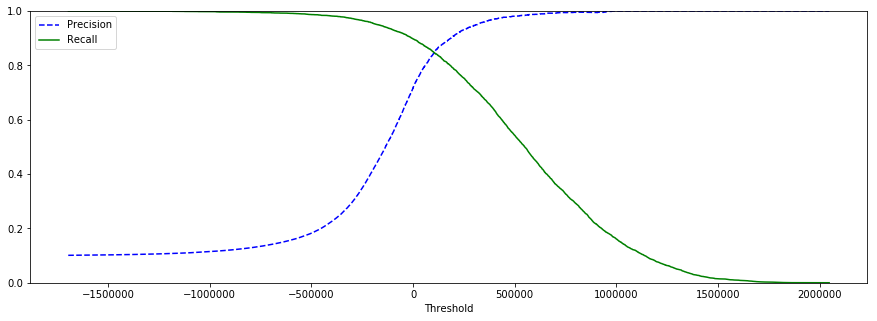

In [26]:
plt.figure(figsize=(15,5))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [27]:
y_train_prec_90 = (y_scores>100000)
precision_score(y_train_2,y_train_prec_90)

0.84259259259259256

In [28]:
recall_score(y_train_2,y_train_prec_90)

0.84965286090495573

# ROC curve

In [29]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_train_2,y_scores)
def plot_roc_curve(fpr,tpr,label =None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

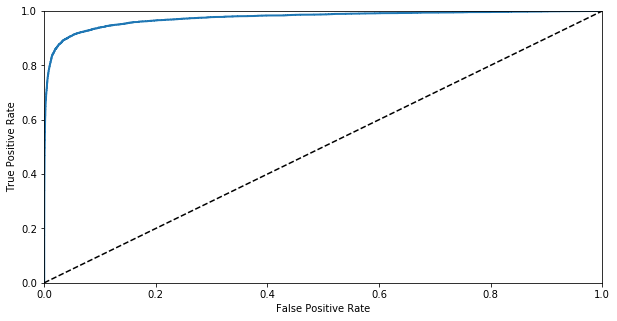

In [30]:
plt.figure(figsize=(10,5))
plot_roc_curve(fpr,tpr)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_2,y_scores)

0.9749404555780532

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_2,cv=3,method="predict_proba")

In [33]:
y_scores_forest = y_probas_forest[:,1]  #score = proba of positive class

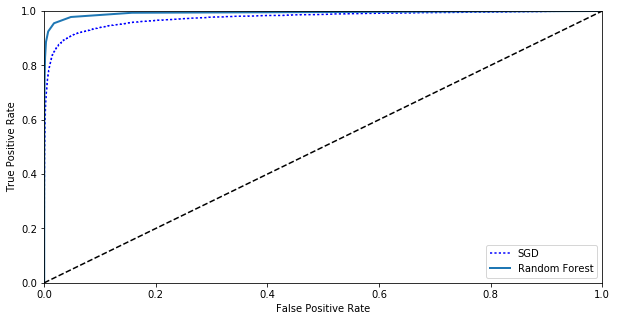

In [34]:
from sklearn.metrics import roc_curve
fpr_forest , tpr_forest , thresholds_forest = roc_curve(y_train_2,y_scores_forest)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="best")
plt.show()

In [35]:
roc_auc_score(y_train_2,y_scores_forest)

0.99301309095879375

In [36]:
precision_score(y_train_2,(y_scores_forest>0.5))

0.98298355076574018

In [37]:
recall_score(y_train_2,(y_scores_forest>0.5))

0.82978214029207564

## Multiclass classification

In [38]:
#One versus rest 
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=int64)

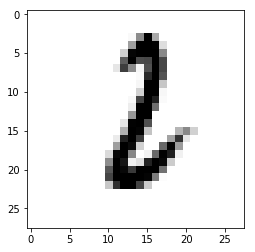

In [39]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = 'nearest')

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [41]:
some_digit_scores

array([[-1072960.14004672,  -202429.86035849,  -160970.45732214,
            5801.72266677, -1033130.58795214,  -361026.32922966,
           -2293.78722182,  -436699.8788322 ,  -455316.82708978,
         -955475.47897266]])

In [42]:
np.argmax(some_digit_scores)

3

In [43]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [44]:
sgd_clf.classes_[2]

2

In [45]:
#one versus one 
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([3], dtype=int64)

In [46]:
#Using random Forest
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([2], dtype=int64)

In [47]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0.1,  0.8,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [48]:
#Using cross_val_score in stochastic gradient descent
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([ 0.87839189,  0.87291042,  0.86883841])

In [49]:
#scaling the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([ 0.91223936,  0.90955851,  0.9067724 ])

## Error Analysis

In [50]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[4010,    1,   11,    9,    7,   32,   36,    4,   21,    1],
       [   0, 4529,   24,   25,    3,   21,    9,    7,   62,    4],
       [  32,   27, 3708,   74,   67,   22,   70,   51,  109,   17],
       [  28,   28,   97, 3800,    1,  162,   31,   37,   99,   68],
       [  11,   22,   29,    7, 3742,    6,   37,   19,   52,  147],
       [  57,   36,   17,  135,   59, 3191,   83,   24,  116,   77],
       [  30,   14,   15,    0,   26,   68, 3950,    5,   29,    0],
       [  24,   15,   53,   19,   27,    8,    5, 4061,    6,  183],
       [  41,   93,   39,  120,   11,  106,   38,   20, 3495,  100],
       [  31,   22,   17,   65,  115,   17,    1,  148,   58, 3714]])

In [51]:
cnf_matr = DataFrame(conf_mx)
cnf_matr.columns = ['Predicted' + str(i) for i in range(10)]
cnf_matr.index = ['Actual' + str(i) for i in range(10)]
cnf_matr['Total'] = np.sum(cnf_matr,axis=1)
cnf_matr

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,Total
Actual0,4010,1,11,9,7,32,36,4,21,1,4132
Actual1,0,4529,24,25,3,21,9,7,62,4,4684
Actual2,32,27,3708,74,67,22,70,51,109,17,4177
Actual3,28,28,97,3800,1,162,31,37,99,68,4351
Actual4,11,22,29,7,3742,6,37,19,52,147,4072
Actual5,57,36,17,135,59,3191,83,24,116,77,3795
Actual6,30,14,15,0,26,68,3950,5,29,0,4137
Actual7,24,15,53,19,27,8,5,4061,6,183,4401
Actual8,41,93,39,120,11,106,38,20,3495,100,4063
Actual9,31,22,17,65,115,17,1,148,58,3714,4188


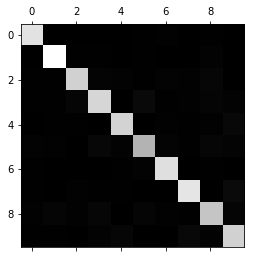

In [52]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [53]:
norm_conf_mx = cnf_matr.copy()
for i in range(len(norm_conf_mx.columns)-1):
    norm_conf_mx.iloc[i,:] = norm_conf_mx.iloc[i,:]/norm_conf_mx.iloc[i,10]

In [54]:
norm_conf_mx

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,Total
Actual0,0.970474,0.000242,0.002662,0.002178,0.001694,0.007744,0.008712,0.000968,0.005082,0.000242,1.0
Actual1,0.000000,0.966909,0.005124,0.005337,0.000640,0.004483,0.001921,0.001494,0.013237,0.000854,1.0
Actual2,0.007661,0.006464,0.887718,0.017716,0.016040,0.005267,0.016758,0.012210,0.026095,0.004070,1.0
Actual3,0.006435,0.006435,0.022294,0.873362,0.000230,0.037233,0.007125,0.008504,0.022753,0.015629,1.0
Actual4,0.002701,0.005403,0.007122,0.001719,0.918959,0.001473,0.009086,0.004666,0.012770,0.036100,1.0
Actual5,0.015020,0.009486,0.004480,0.035573,0.015547,0.840843,0.021871,0.006324,0.030567,0.020290,1.0
Actual6,0.007252,0.003384,0.003626,0.000000,0.006285,0.016437,0.954798,0.001209,0.007010,0.000000,1.0
Actual7,0.005453,0.003408,0.012043,0.004317,0.006135,0.001818,0.001136,0.922745,0.001363,0.041581,1.0
Actual8,0.010091,0.022889,0.009599,0.029535,0.002707,0.026089,0.009353,0.004922,0.860202,0.024612,1.0
Actual9,0.007402,0.005253,0.004059,0.015521,0.027459,0.004059,0.000239,0.035339,0.013849,0.886819,1.0


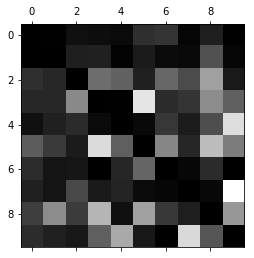

In [55]:
norm_conf_mx_array = np.array(norm_conf_mx.iloc[:,:-1])
np.fill_diagonal(norm_conf_mx_array,0)
plt.matshow(norm_conf_mx_array,cmap=plt.cm.gray)

## Multilabel Classification

In [56]:
#predicting multiple labels in one class
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ..., 
       [False, False],
       [ True,  True],
       [False,  True]], dtype=bool)

In [57]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])

array([[False, False]], dtype=bool)

## Multioutput Classification

In [108]:
#to clean an image(a label can have multiple values in this case(0 to 255))
noise = np.random.randint(0,100,X_train.shape)
X_train_mod = X_train + noise
noise = np.random.randint(0,100,X_test.shape)
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod =X_test

In [113]:
some_digit = X_test_mod.iloc[30,:]
some_digit_image = some_digit.values.reshape(28,28)

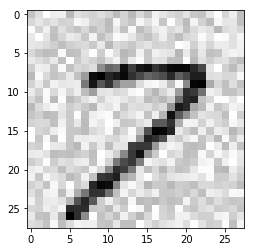

In [114]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = 'nearest')

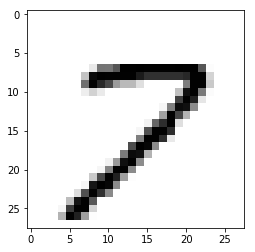

In [115]:
some_digit = y_test_mod.iloc[30,:]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = 'nearest')

In [116]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

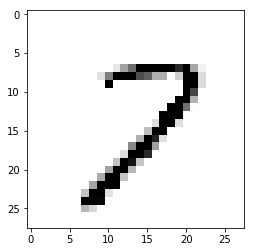

In [123]:
clean_digit.reshape(28,28)
plt.imshow(clean_digit.reshape(28,28),cmap = matplotlib.cm.binary,interpolation = 'nearest')